In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#crear carpeta con resultados
import os
import pandas as pd
try:
  os.mkdir('resultados')
except:
  print("Carpeta resultados ya existe")

import warnings #eliminar warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
#render de figs sobre notebook
%matplotlib inline 
# para graficar
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
from matplotlib import style
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [5]:
#Importar la data
from google.colab import files 

uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [42]:
#importando la data de vino rojo
import io 
  
df_red = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']), sep=';') 
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
df_white = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']), sep=';') 
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [45]:
df_red_copy = df_red.copy() 

In [44]:
df_white_copy = df_white.copy() 

In [46]:
missing_data = df_red.isnull()
missing_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

fixed acidity
False    1599
Name: fixed acidity, dtype: int64

volatile acidity
False    1599
Name: volatile acidity, dtype: int64

citric acid
False    1599
Name: citric acid, dtype: int64

residual sugar
False    1599
Name: residual sugar, dtype: int64

chlorides
False    1599
Name: chlorides, dtype: int64

free sulfur dioxide
False    1599
Name: free sulfur dioxide, dtype: int64

total sulfur dioxide
False    1599
Name: total sulfur dioxide, dtype: int64

density
False    1599
Name: density, dtype: int64

pH
False    1599
Name: pH, dtype: int64

sulphates
False    1599
Name: sulphates, dtype: int64

alcohol
False    1599
Name: alcohol, dtype: int64

quality
False    1599
Name: quality, dtype: int64



In [48]:
df_red.shape

(1599, 12)

In [49]:
missing_data2 = df_white.isnull()
missing_data2.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("")

fixed acidity
False    4898
Name: fixed acidity, dtype: int64

volatile acidity
False    4898
Name: volatile acidity, dtype: int64

citric acid
False    4898
Name: citric acid, dtype: int64

residual sugar
False    4898
Name: residual sugar, dtype: int64

chlorides
False    4898
Name: chlorides, dtype: int64

free sulfur dioxide
False    4898
Name: free sulfur dioxide, dtype: int64

total sulfur dioxide
False    4898
Name: total sulfur dioxide, dtype: int64

density
False    4898
Name: density, dtype: int64

pH
False    4898
Name: pH, dtype: int64

sulphates
False    4898
Name: sulphates, dtype: int64

alcohol
False    4898
Name: alcohol, dtype: int64

quality
False    4898
Name: quality, dtype: int64



In [51]:
df_white.shape

(4898, 12)

Como podemos ver en ninguna de las dos datas tenemos datos perdidos, por lo cual procedemos a revisar el tipo de variables de cada columna.

##  Tipo de Datos

In [52]:
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [26]:
df_white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

Vemos que para las bases de datos des vinos es correcta.

## Normalización de la data

In [53]:
def normal(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [54]:
df_red= normal(df_red)
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271,-0.787576
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136,0.450707
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460,0.450707
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243,-0.787576


In [55]:
df_white= normal(df_white)
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,0.137856
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,0.137856
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,0.137856
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.775936,-0.677032,-0.365159,-0.944669,-0.309976,-0.664902,-1.090889,-0.965385,0.541278,0.088964,0.557225,0.137856
4894,-0.301928,0.414297,0.213258,0.317146,0.056190,1.275460,0.697428,0.291759,-0.253420,-0.261526,-0.742932,-0.991273
4895,-0.420430,-0.379397,-1.191470,-1.023532,-0.218435,-0.312109,-0.643809,-0.497299,-1.313019,-0.261526,-0.905451,0.137856
4896,-1.605449,0.116662,-0.282528,-1.043248,-1.088081,-0.900098,-0.667340,-1.784534,1.004853,-0.962507,1.857382,1.266985


In [56]:
df_red["color"] = 'Red'

In [57]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576,Red
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576,Red
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576,Red
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707,Red
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576,Red


In [58]:
df_white["color"] = 'White'

In [59]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,0.137856,White
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,0.137856,White
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,0.137856,White
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856,White
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856,White


In [60]:
df = pd.concat([df_red, df_white])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576,Red
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576,Red
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576,Red
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707,Red
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.775936,-0.677032,-0.365159,-0.944669,-0.309976,-0.664902,-1.090889,-0.965385,0.541278,0.088964,0.557225,0.137856,White
4894,-0.301928,0.414297,0.213258,0.317146,0.056190,1.275460,0.697428,0.291759,-0.253420,-0.261526,-0.742932,-0.991273,White
4895,-0.420430,-0.379397,-1.191470,-1.023532,-0.218435,-0.312109,-0.643809,-0.497299,-1.313019,-0.261526,-0.905451,0.137856,White
4896,-1.605449,0.116662,-0.282528,-1.043248,-1.088081,-0.900098,-0.667340,-1.784534,1.004853,-0.962507,1.857382,1.266985,White


In [64]:
df_quality = pd.concat([df_red_copy[['quality']], df_white_copy[['quality']]])
df_quality

,quality
0,5
1,5
2,5
3,6
4,5
...,...
4893,6
4894,5
4895,6
4896,7


In [66]:
df['quality'] = df_quality['quality']
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,5,Red
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,5,Red
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,5,Red
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,6,Red
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.775936,-0.677032,-0.365159,-0.944669,-0.309976,-0.664902,-1.090889,-0.965385,0.541278,0.088964,0.557225,6,White
4894,-0.301928,0.414297,0.213258,0.317146,0.056190,1.275460,0.697428,0.291759,-0.253420,-0.261526,-0.742932,5,White
4895,-0.420430,-0.379397,-1.191470,-1.023532,-0.218435,-0.312109,-0.643809,-0.497299,-1.313019,-0.261526,-0.905451,6,White
4896,-1.605449,0.116662,-0.282528,-1.043248,-1.088081,-0.900098,-0.667340,-1.784534,1.004853,-0.962507,1.857382,7,White


## Agrupador

Text(0.5, 1.0, 'Barras calidad')

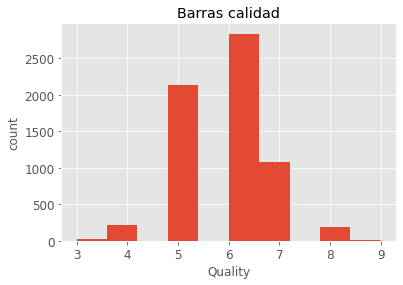

In [67]:
plt.hist(df["quality"])

# set x/y labels and plot title
plt.xlabel("Quality")
plt.ylabel("count")
plt.title("Barras calidad")

In [70]:
bins = np.linspace(min(df["quality"]), max(df["quality"]), 4)
bins

array([3., 5., 7., 9.])

In [71]:
group_names = ['Low', 'Medium', 'High']
group_names

['Low', 'Medium', 'High']

In [72]:
df['quality-binned'] = pd.cut(df['quality'], bins, labels=group_names, include_lowest=True )
df[['quality','quality-binned']].head(20)

,quality,quality-binned
0,5,Low
1,5,Low
2,5,Low
3,6,Medium
4,5,Low
5,5,Low
6,5,Low
7,7,Medium
8,7,Medium
9,5,Low


In [73]:
df['quality-binned'].value_counts()

Medium    3915
Low       2384
High       198
Name: quality-binned, dtype: int64

Text(0.5, 1.0, 'quality bins')

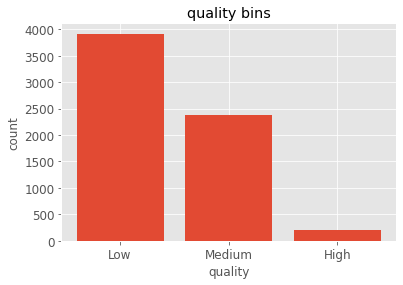

In [74]:
plt.bar(group_names, df["quality-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("quality")
plt.ylabel("count")
plt.title("quality bins")

In [75]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,quality-binned
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,5,Red,Low
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,5,Red,Low
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,5,Red,Low
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,6,Red,Medium
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,5,Red,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.775936,-0.677032,-0.365159,-0.944669,-0.309976,-0.664902,-1.090889,-0.965385,0.541278,0.088964,0.557225,6,White,Medium
4894,-0.301928,0.414297,0.213258,0.317146,0.056190,1.275460,0.697428,0.291759,-0.253420,-0.261526,-0.742932,5,White,Low
4895,-0.420430,-0.379397,-1.191470,-1.023532,-0.218435,-0.312109,-0.643809,-0.497299,-1.313019,-0.261526,-0.905451,6,White,Medium
4896,-1.605449,0.116662,-0.282528,-1.043248,-1.088081,-0.900098,-0.667340,-1.784534,1.004853,-0.962507,1.857382,7,White,Medium
